In [13]:
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_point, aes, ggsave, \
stat_smooth, facet_wrap, geom_bar, stat_count, facet_grid, geom_col, theme_light, theme, xlab, ylab, scale_color_brewer, \
theme_classic, theme_minimal, scale_fill_manual, element_text, labs
from plotnine.data import mpg

In [2]:
data = pd.read_csv('legacy_AUC_results.csv')

In [3]:
data['label'] = data.source.apply(lambda x: x.split('-')[-1])

In [4]:
data.source = data.apply(lambda x: x.source.replace("-" + x.label, ""), axis=1)
data['label'] = data.label.apply(lambda x: x.strip('tier'))
data['label'] = data.label.apply(lambda x: x.replace('chem', 'Tchem').replace('clin', 'Tclin').replace('dark', 'Tdark'))

In [5]:
sources = data.source.unique().tolist()
pharos = ['Tdark', 'Tclin', 'Tchem']
tiers = list(set(data.label.unique().tolist()) - set(pharos))
data['label_type'] = ['pharos' if x in pharos else 'tier' for x in data.label]
label_types = data.label_type.unique().tolist()
data.replace('inter', 'InterPro', inplace=True)
data.replace('pharos-inter', 'Pharos+InterPro', inplace=True)
data.replace('all-mantis', 'All+Mantis', inplace=True)
data.replace('all', 'All', inplace=True)
data = data[data.label != 'dark']

In [6]:
data.sort_values('AUC', ascending =False)[:50]

,model,AUC,source,label,label_type
16,GradientBoostingClassifier,0.989845,Pharos+InterPro,Tclin,pharos
68,GradientBoostingClassifier,0.989763,All,Tclin,pharos
44,GradientBoostingClassifier,0.989356,All+Mantis,Tclin,pharos
17,RandomForestClassifier,0.986812,Pharos+InterPro,Tclin,pharos
45,RandomForestClassifier,0.986639,All+Mantis,Tclin,pharos
69,RandomForestClassifier,0.986638,All,Tclin,pharos
70,ExtraTreesClassifier,0.977163,All,Tclin,pharos
46,ExtraTreesClassifier,0.976685,All+Mantis,Tclin,pharos
18,ExtraTreesClassifier,0.975888,Pharos+InterPro,Tclin,pharos
47,SVC,0.974866,All+Mantis,Tclin,pharos


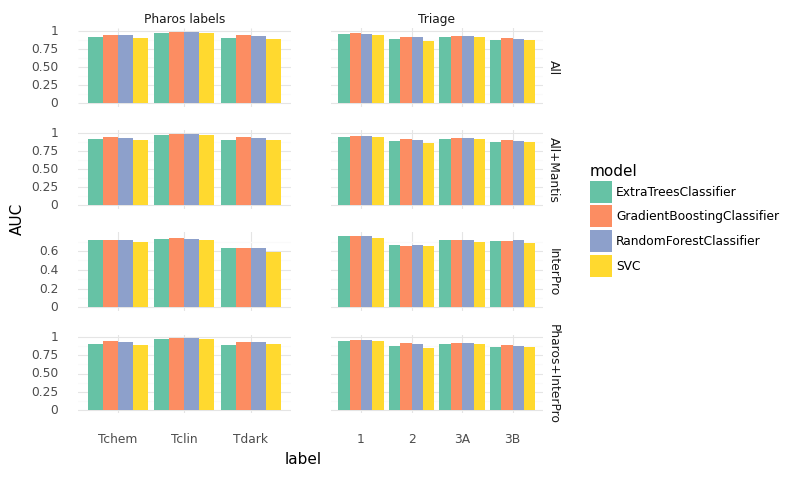

<ggplot: (8794516892139)>

In [7]:
data1 = data.replace({'pharos': 'Pharos labels', 'tier': 'Triage'})
ggplot(data1) + geom_col(aes(x='label', y='AUC', fill='model'), stat="identity", position='dodge')\
+ facet_grid("source~label_type", scales="free", space="free") + theme_minimal() \
+ scale_fill_manual(values=['#66c2a5','#fc8d62','#8da0cb','#ffd92f']) + theme(subplots_adjust={'hspace':0.30}) \
+ theme(panel_spacing=0.4, figure_size=(6,5))

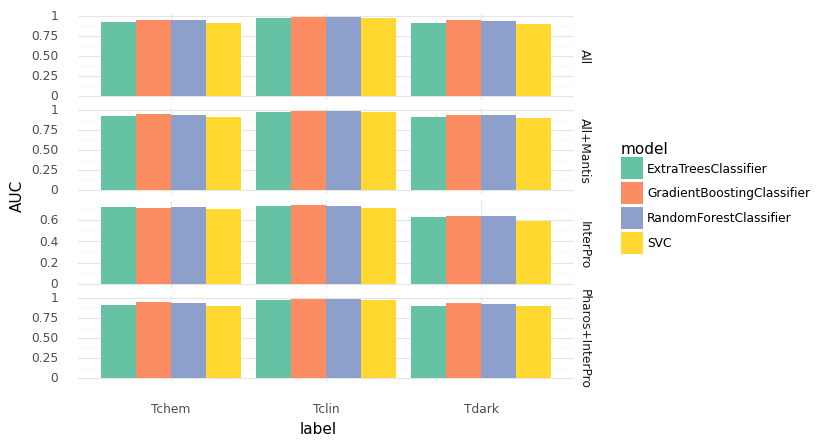

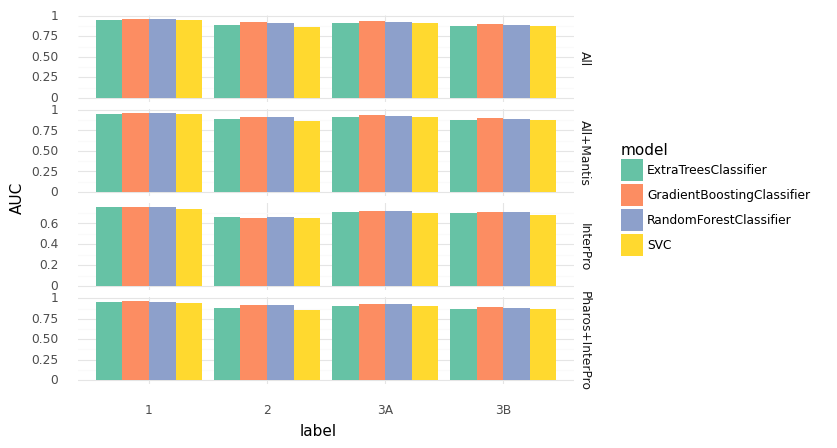

In [8]:
for genre in label_types:
    dataset = data[data.label_type==genre]
    
    print(ggplot(dataset) + geom_col(aes(x='label', y='AUC', fill='model'), stat="identity", position='dodge')\
    + facet_grid("source~", scales="free", space="free") + theme_minimal() \
    + scale_fill_manual(values=['#66c2a5','#fc8d62','#8da0cb','#ffd92f']))

/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: auc_features_pharos.png
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: auc_features_pharos.pdf


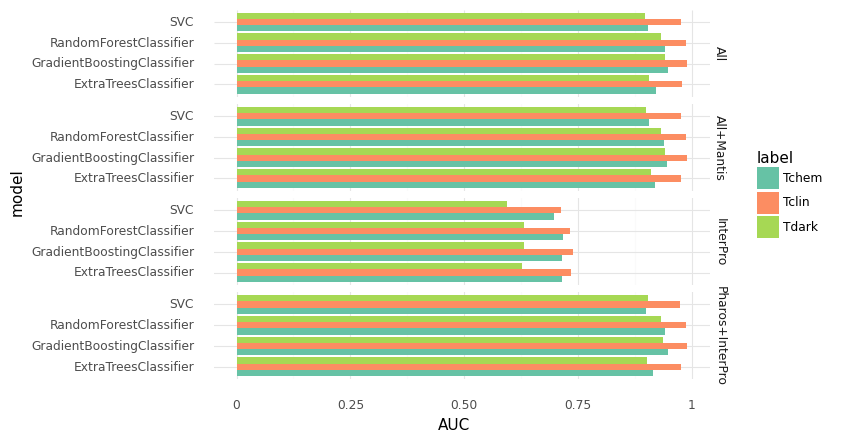

/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: auc_features_tier.png
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/kscj554/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: auc_features_tier.pdf


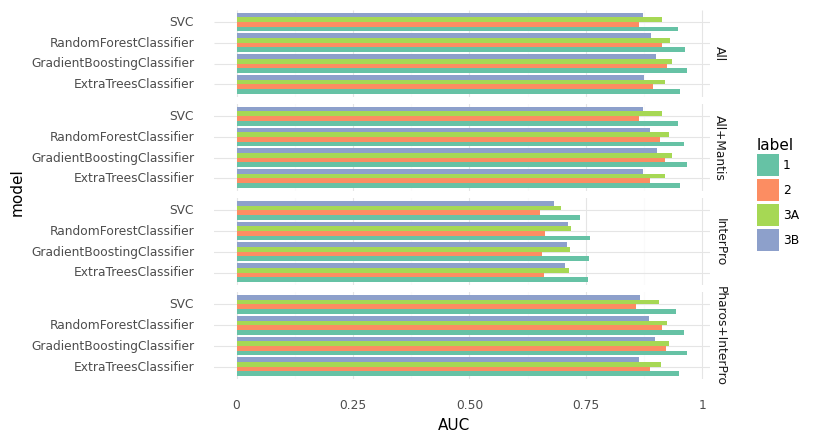

In [29]:
from plotnine import coord_flip
for genre in label_types:
    dataset = data[data.label_type==genre]
    
    p = ggplot(dataset) + geom_col(aes(x='model', y='AUC', fill='label'), stat="identity", position='dodge')\
    + facet_grid("source~", scales="free", space="free") + theme_minimal() \
    + scale_fill_manual(values=['#66c2a5', '#fc8d62', '#a6d854', '#8da0cb']) + coord_flip()
    ggsave(plot=p,filename="auc_features_"+genre+".png")
    ggsave(plot=p,filename="auc_features_"+genre+".pdf")
    print(p)

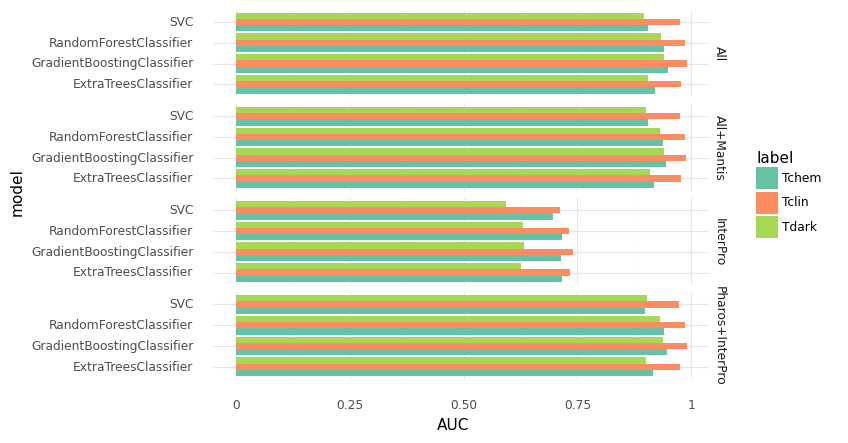

<ggplot: (67399970)>


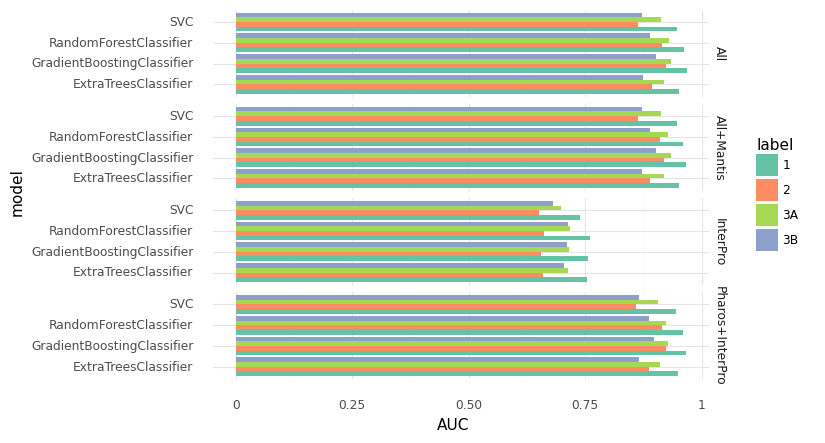

<ggplot: (67595566)>


In [10]:
from plotnine import coord_flip
for genre in label_types:
    dataset = data[data.label_type==genre]
    
    print(ggplot(dataset) + geom_col(aes(x='model', y='AUC', fill='label'), stat="identity", position='dodge')\
    + facet_grid("source~", scales="free", space="free") + theme_minimal() \
    + scale_fill_manual(values=['#66c2a5', '#fc8d62', '#a6d854', '#8da0cb']) + coord_flip())

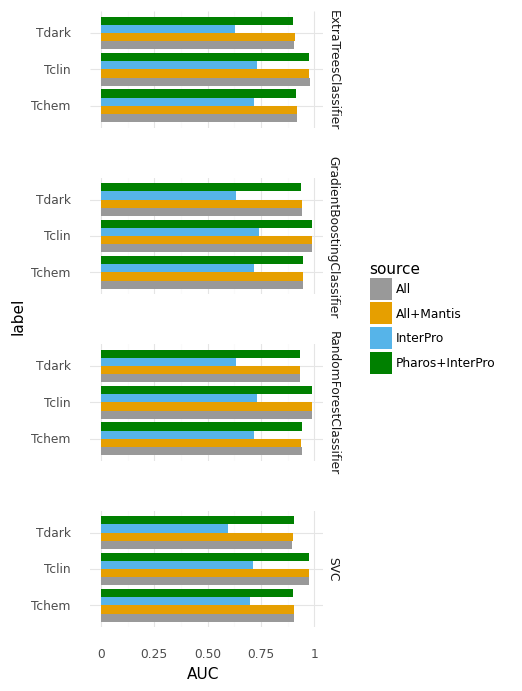

<ggplot: (67786424)>


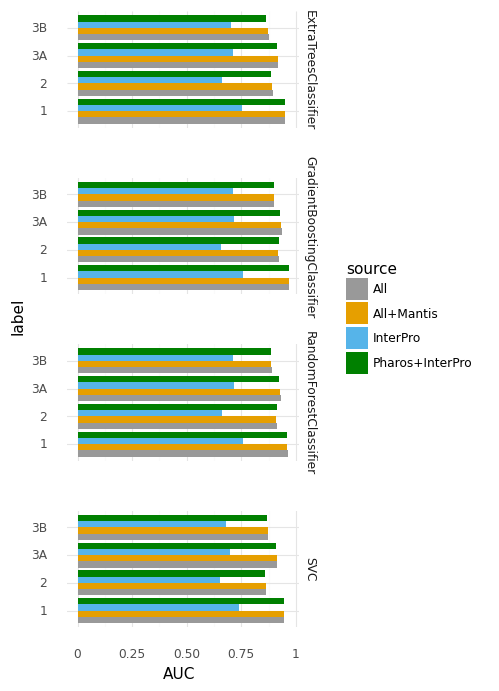

<ggplot: (68099130)>


In [11]:
from plotnine import coord_flip
for genre in label_types:
    dataset = data[data.label_type==genre]
    
    print(ggplot(dataset) + geom_col(aes(x='label', y='AUC', fill='source'), stat="identity", position='dodge')\
    + facet_grid("model~", scales="free", space="free") + theme_minimal()  + coord_flip() \
    + scale_fill_manual(values=["#999999", "#E69F00", "#56B4E9", 'green']) + theme(panel_spacing=0.5, figure_size=(3,8)))

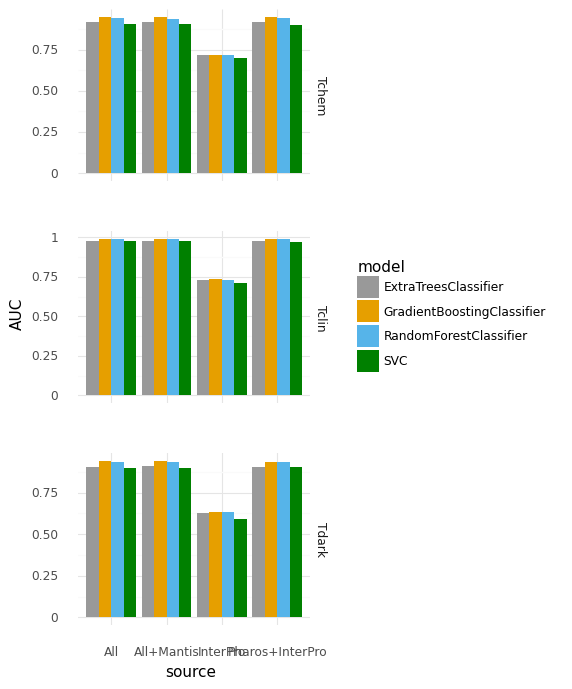

<ggplot: (68088546)>


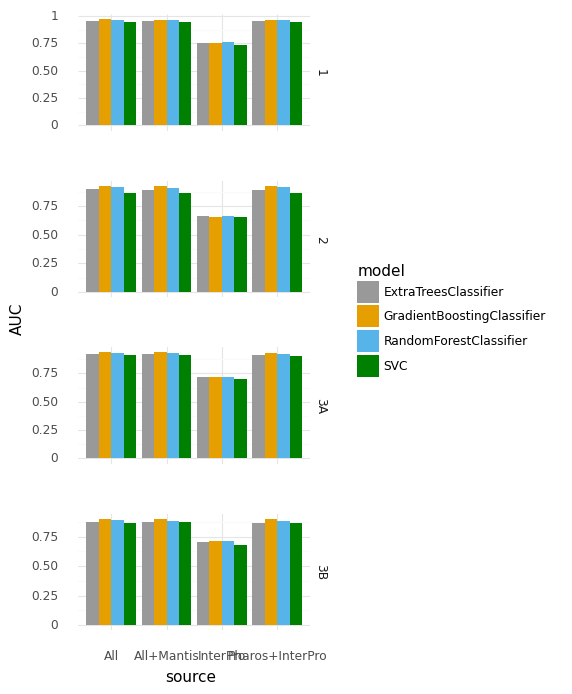

<ggplot: (68200244)>


In [12]:
from plotnine import coord_flip
for genre in label_types:
    dataset = data[data.label_type==genre]
    
    print(ggplot(dataset) + geom_col(aes(x='source', y='AUC', fill='model'), stat="identity", position='dodge')\
    + facet_grid("label~", scales="free", space="free") + theme_minimal() \
    + scale_fill_manual(values=["#999999", "#E69F00", "#56B4E9", 'green']) + theme(panel_spacing=0.5, figure_size=(3,8)))

In [13]:
data_source = ['All', 'All+Mantis', 'Pharos+InterPro', 'InterPro'] #data['source'].unique().tolist()
source_cat = pd.Categorical(data['source'], categories=data_source)

# assign to a new column in the DataFrame
data = data.assign(data_source = source_cat)
data = data.assign(source_cat = data['data_source'].cat.reorder_categories(data_source))
data.rename(columns={'data_source':'Data source'}, inplace=True)


# labels = data['label'].unique().tolist()
# label_cat = pd.Categorical(data['label'], categories=labels)

# # assign to a new column in the DataFrame
# data = data.assign(label = label_cat)
# data

In [14]:
data_source

['All', 'All+Mantis', 'Pharos+InterPro', 'InterPro']

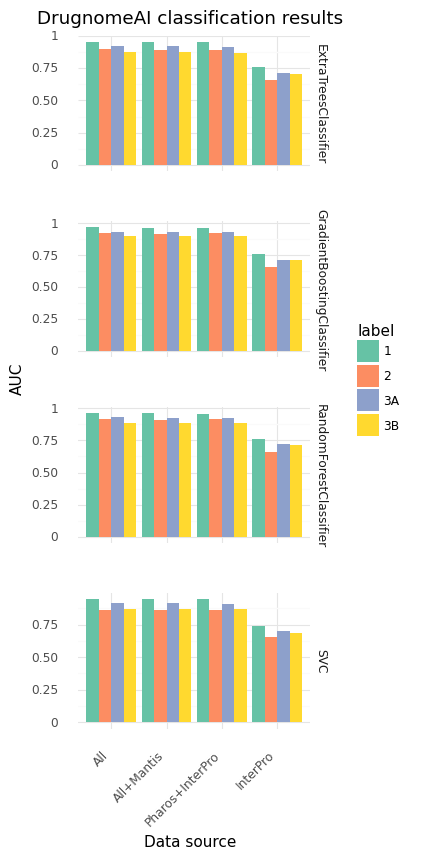

<ggplot: (63835944)>


In [15]:
## Grouped barplots based on classfiers + without Dark 
tiers = data[data.label_type=='tier']
labels = tiers['label'].unique().tolist().sort()
label_cat = pd.Categorical(tiers['label'], categories=labels, ordered=True)

#assign to a new column in the DataFrame
tiers = tiers.assign(label = label_cat)
tiers.sort_values(['label'], inplace=True)
print(ggplot(tiers) + geom_col(aes(x='Data source', y='AUC', fill='label'),\
                                 stat="identity", position='dodge')\
+ facet_grid("model~", scales="free", space="free") + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5','#fc8d62','#8da0cb','#ffd92f', '#ffff99','#386cb0','#f0027f'])\
      + theme(panel_spacing=0.5, figure_size=(3,9)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results")  )

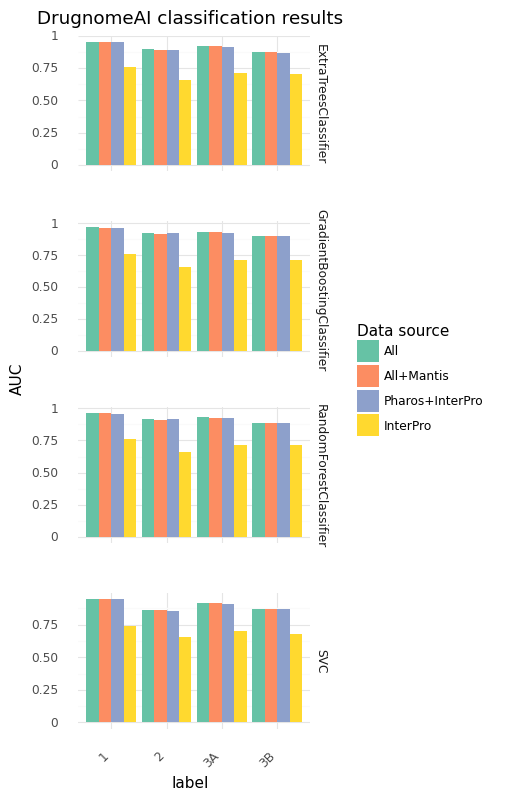

<ggplot: (62163824)>


In [16]:
print(ggplot(tiers) + geom_col(aes(x='label', y='AUC', fill='Data source'),\
                                 stat="identity", position='dodge')\
+ facet_grid("model~", scales="free", space="free") + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5','#fc8d62','#8da0cb','#ffd92f'])\
      + theme(panel_spacing=0.5, figure_size=(3,9)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results")  )

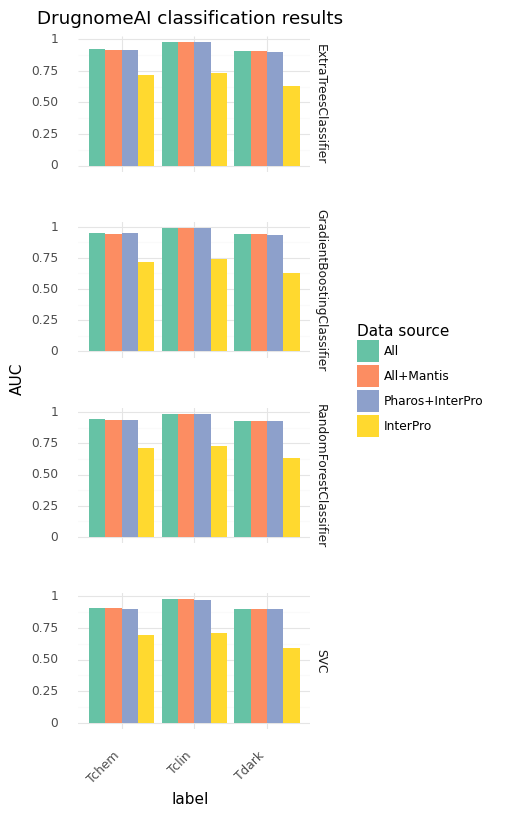

<ggplot: (62171588)>


In [17]:
pharos = data[data.label_type=='pharos']
labels = pharos['label'].unique().tolist()
label_cat = pd.Categorical(pharos['label'], categories=labels)

print(ggplot(pharos) + geom_col(aes(x='label', y='AUC', fill='Data source'),\
                                 stat="identity", position='dodge')\
+ facet_grid("model~", scales="free", space="free") + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5','#fc8d62','#8da0cb','#ffd92f'])\
      + theme(panel_spacing=0.5, figure_size=(3,9)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results")  )

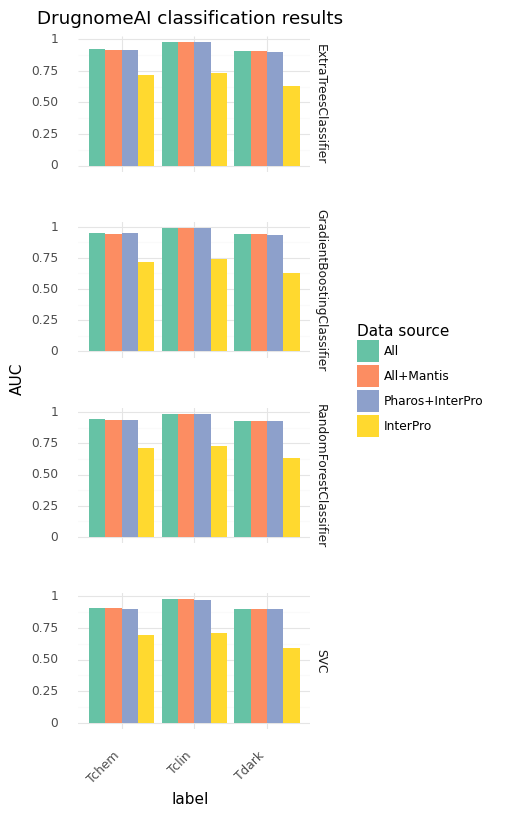

<ggplot: (67592997)>


In [18]:
pharos = data[data.label_type=='pharos']
pharos = pharos[pharos.label!='dark']
labels = pharos['label'].unique().tolist()
label_cat = pd.Categorical(pharos['label'], categories=labels)

print(ggplot(pharos) + geom_col(aes(x='label', y='AUC', fill='Data source'),\
                                 stat="identity", position='dodge')\
+ facet_grid("model~", scales="free", space="free") + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5','#fc8d62','#8da0cb','#ffd92f'])\
      + theme(panel_spacing=0.5, figure_size=(3,9)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results")  )

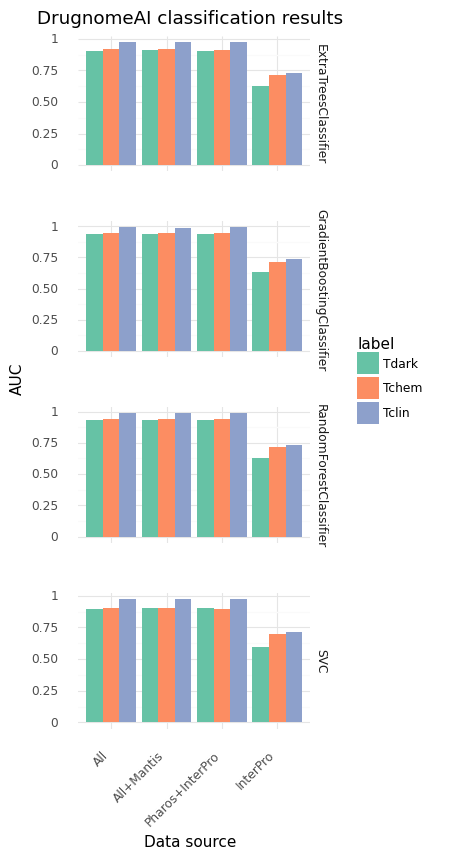

<ggplot: (62375253)>


In [19]:
pharos = data[data.label_type=='pharos']
pharos = pharos[pharos.label!='dark']
labels = pharos['label'].unique().tolist()
label_cat = pd.Categorical(pharos['label'], categories=labels)

# assign to a new column in the DataFrame
pharos = pharos.assign(label = label_cat)
pharos.sort_values(['label'], inplace=True)
print(ggplot(pharos) + geom_col(aes(x='Data source', y='AUC', fill='label'),\
                                 stat="identity", position='dodge')\
+ facet_grid("model~", scales="free", space="free") + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5','#fc8d62','#8da0cb','#ffd92f'])\
      + theme(panel_spacing=0.5, figure_size=(3,9)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results")  )

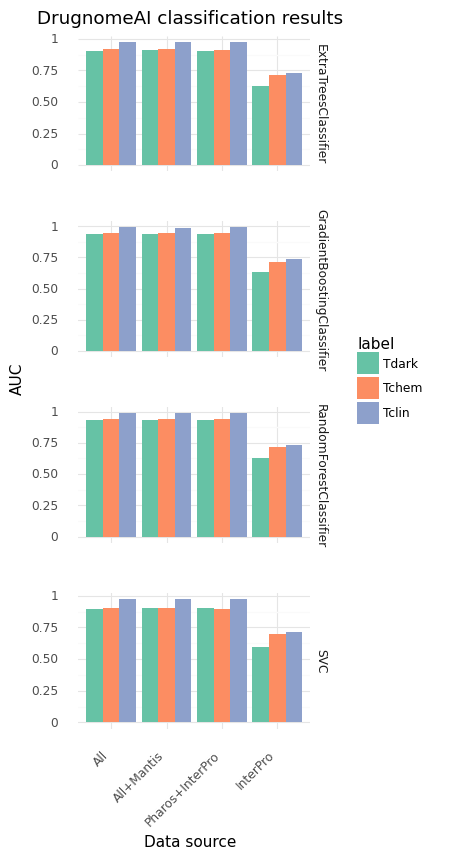

<ggplot: (68236581)>


In [20]:
pharos = data[data.label_type=='pharos']
# pharos = pharos[pharos.label!='dark']
labels = pharos['label'].unique().tolist()
label_cat = pd.Categorical(pharos['label'], categories=labels)

# assign to a new column in the DataFrame
pharos = pharos.assign(label = label_cat)
pharos.sort_values(['label'], inplace=True)
print(ggplot(pharos) + geom_col(aes(x='Data source', y='AUC', fill='label'),\
                                 stat="identity", position='dodge')\
+ facet_grid("model~", scales="free", space="free") + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5','#fc8d62','#8da0cb','#ffd92f'])\
      + theme(panel_spacing=0.5, figure_size=(3,9)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results")  )

C:\Users\tulodzie\Anaconda3\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


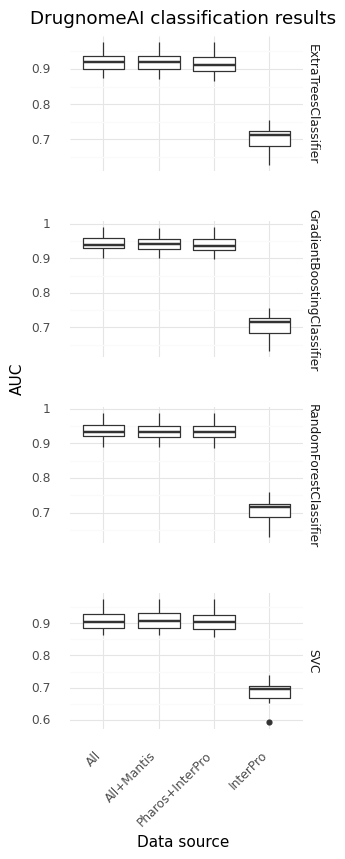

<ggplot: (67440180)>


In [21]:
from plotnine import geom_boxplot
print(ggplot(data) + geom_boxplot(aes(x='Data source', y='AUC'))\
+ facet_grid("model~", scales="free", space="free") + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5','#fc8d62','#8da0cb','#ffd92f'])\
      + theme(panel_spacing=0.5, figure_size=(3,9)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results")  )

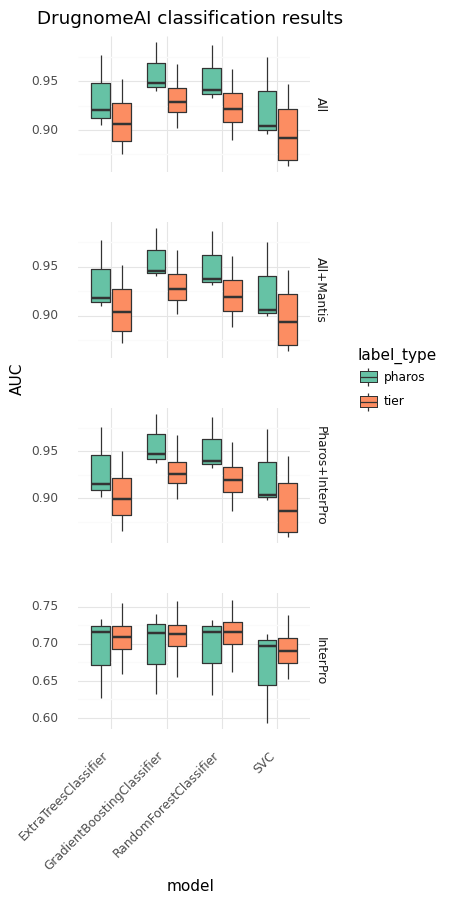

<ggplot: (63611037)>


In [22]:
from plotnine import geom_boxplot
print(ggplot(data) + geom_boxplot(aes(x='model', y='AUC', fill='label_type'))\
+ facet_grid("Data source ~", scales="free", space="free") + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5','#fc8d62','#8da0cb','#ffd92f'])\
      + theme(panel_spacing=0.5, figure_size=(3,9)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results")  )

C:\Users\tulodzie\Anaconda3\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


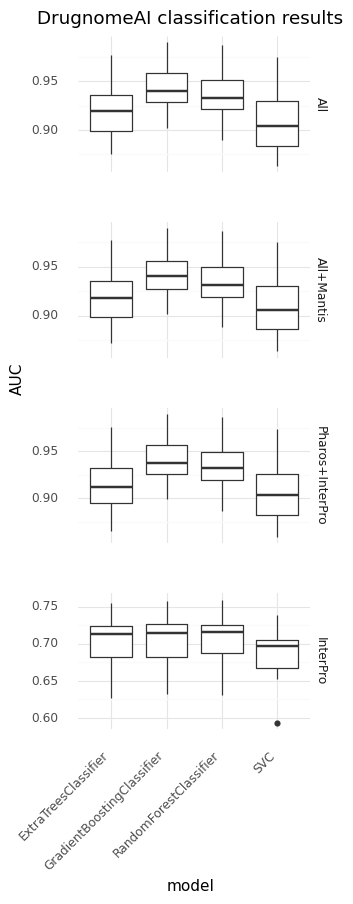

<ggplot: (67419603)>


In [23]:
from plotnine import geom_boxplot
print(ggplot(data) + geom_boxplot(aes(x='model', y='AUC'))\
+ facet_grid("Data source ~", scales="free", space="free") + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5','#fc8d62','#8da0cb','#ffd92f'])\
      + theme(panel_spacing=0.5, figure_size=(3,9)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results")  )

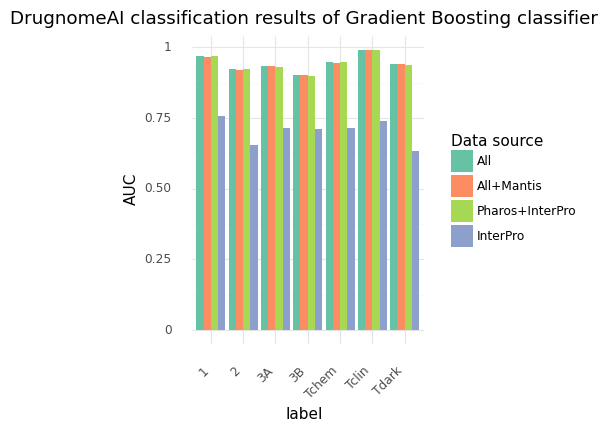

<ggplot: (63894137)>


In [26]:
print(ggplot(data[data.model=='GradientBoostingClassifier']) + geom_col(aes(x='label', y='AUC', \
   fill='Data source'),\
                                 stat="identity", position='dodge')\
# + facet_grid("label_type~", scales="free", space="free") \
      + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5', '#fc8d62', '#a6d854', '#8da0cb'])\
      + theme(panel_spacing=0.5, figure_size=(3,4)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results of Gradient Boosting classifier")  )

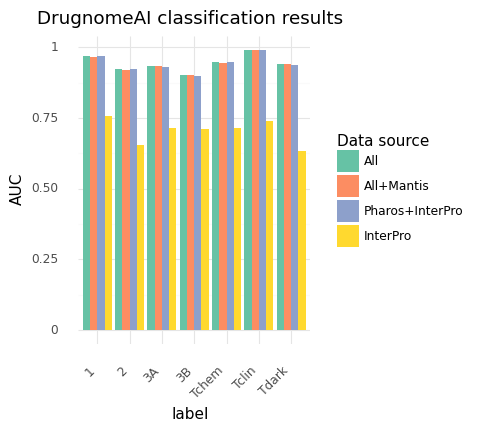

<ggplot: (68233361)>


In [25]:
gb = data[data.model=='GradientBoostingClassifier']
gb = gb[gb.label!='dark']
print(ggplot(gb) + geom_col(aes(x='label', y='AUC', \
   fill='Data source'),\
                                 stat="identity", position='dodge')\
# + facet_grid("label_type~", scales="free", space="free") \
      + theme_minimal()  \
    + scale_fill_manual(values=['#66c2a5','#fc8d62','#8da0cb','#ffd92f'])\
      + theme(panel_spacing=0.5, figure_size=(3,4)) \
#      + geom_text(aes(label="label")) \
     + theme(axis_text_x=element_text(rotation=45, hjust=1)) \
      + labs(title="DrugnomeAI classification results")  )